In [165]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import spatial
import matplotlib.pyplot as plt

In [196]:
# 计算城市之间的距离矩阵
def matrix_dis(N,city):
        res = np.zeros((N,N))
        for i in range(N):
            for j in range(i+1,N):
                res[i,j] = np.linalg.norm(city[i,:]-city[j,:])
                res[j,i] = res[i,j]
        return res


# 动态方程计算微分方程du
def calc_du(V, distance):
    a = np.sum(V, axis=0) - 1  # 按列相加
    b = np.sum(V, axis=1) - 1  # 按行相加
    t1 = np.zeros((N, N))
    t2 = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            t1[i, j] = a[j]
    for i in range(N):
        for j in range(N):
            t2[j, i] = b[j]
    # 将第一列移动到最后一列
    c_1 = V[:, 1:N]
    c_0 = np.zeros((N, 1))
    c_0[:, 0] = V[:, 0]
    c = np.concatenate((c_1, c_0), axis=1)
    c = np.dot(distance, c)
    return -A * (t1 + t2) - D * c
# 更新输入电压U
def update_U(U, du, step):
    return U + du * step
# 更新输出电压V
def update_V(U, U0):
    return 1 / 2 * (1 + np.tanh(U / U0))
def calc_distance(path):
    dis = 0.0
    for i in range(len(path) - 1):
        dis += distance[path[i]][path[i+1]]
    return dis

# 计算当前网络的能量
def calc_energy(V, distance):
    t1 = np.sum(np.power(np.sum(V, axis=0) - 1, 2))
    t2 = np.sum(np.power(np.sum(V, axis=1) - 1, 2))
    idx = [i for i in range(1, N)]
    idx = idx + [0]
    Vt = V[:, idx]
    t3 = distance * Vt
    t3 = np.sum(np.sum(np.multiply(V, t3)))
    e = 0.5 * (A * (t1 + t2) + D * t3)
    return e
# 检查路径的正确性
def check_path(V):
    newV = np.zeros([N, N])
    route = []
    for i in range(N):
        mm = np.max(V[:, i])
        for j in range(N):
            if V[j, i] == mm:
                newV[j, i] = 1
                route += [j]
                break
    return route, newV
# 可视化画出哈密顿回路和能量趋势
def draw_H_and_E(citys, H_path, energys,f=0):
    fig = plt.figure()
    # 绘制哈密顿回路
    ax1 = fig.add_subplot(121)
    plt.xlim(0, 7)
    plt.ylim(0, 7)
    for (from_, to_) in H_path:
        p1 = plt.Circle(citys[from_], 0.2, color='red')
        p2 = plt.Circle(citys[to_], 0.2, color='red')
        ax1.add_patch(p1)
        ax1.add_patch(p2)
        ax1.plot((citys[from_][0], citys[to_][0]), (citys[from_][1], citys[to_][1]), color='red')
        ax1.annotate(s=chr(97 + to_), xy=citys[to_], xytext=(-8, -4), textcoords='offset points', fontsize=20)
    ax1.axis('equal')
    ax1.grid()
    # 绘制能量趋势图
    if f==0:
        ax2 = fig.add_subplot(122)
        ax2.plot(np.arange(0, len(energys), 1), energys, color='red')
        plt.show()

经10000次迭代找到的次优解距离为：30.263427181896528，能量为：228.61960407679297，路径为：
b,g,a,f,i,c,d,j,e,h,b


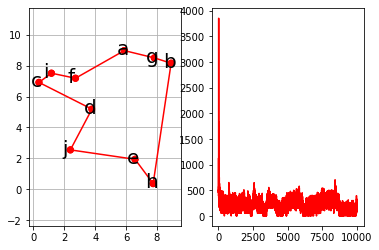

In [167]:
np.random.seed(20)
citys = np.random.rand(10,2)*10 
N = len(citys)#城市数目
distance = matrix_dis(N,citys)
D = N / 2
A= N*N/2
U0 = 0.01  # 初始电压
step = 0.01  # 步长
num_iter = 10000  # 迭代次数
U = 1 / 2 * S0 * np.log(N - 1) + (2 * (np.random.random((N, N))) - 1) # 计算初始化神经网络的输入电压S）
V = update_V(U, U0)

# 开始迭代训练网络
#Hpath,citys, H_path, energys=ModelTrain(num_iter,V,U,U0,S,step)
energys = np.array([0.0 for x in range(num_iter)])  # 每次迭代的能量
best_distance = np.inf  # 最优距离
best_route = []  # 最优路线
H_path = []  # 路线
for n in range(num_iter): #进行迭代
    du = calc_du(V, distance)
    U = update_U(U, du, step)
    V = update_V(U, U0)
    energys[n] = calc_energy(V, distance)
    route, newV = check_path(V)
    #print(route)
    if len(np.unique(route)) == N:
        route.append(route[0])
        dis = calc_distance(route)
        if dis < best_distance:
            H_path = []
            best_distance = dis
            best_route = route
            [H_path.append((route[i], route[i + 1])) for i in range(len(route) - 1)]
if len(H_path) > 0:
    print('经{}次迭代找到的次优解距离为：{}，能量为：{}，路径为：'.format(n+1, best_distance, energys[n]))
    [print(chr(97 + v), end=',' if i < len(best_route) - 1 else '\n') for i, v in enumerate(best_route)]
    draw_H_and_E(citys, H_path, energys)    

经500次迭代找到的次优解距离为：30.263427181896528，路径为：
b,h,e,j,d,c,i,f,a,g,b



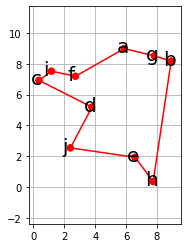

In [195]:
#使用遗传算法进行数值验证
num_points = N
np.random.seed(20)
points_coordinate = np.random.rand(10,2)*10   # generate coordinate of points
distance_matrix = matrix_dis(N,citys)


def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
best_points_route=list(best_points)
best_points_route.append(list(best_points)[0])
H2_path=[]
[H2_path.append((best_points_route[i], best_points_route[i + 1])) for i in range(len(best_points_route) - 1)]
draw_H_and_E(points_coordinate,H2_path,None,f=1)
print('经{}次迭代找到的次优解距离为：{}，路径为：'.format(500,calc_distance(best_points_route),best_points_route))
[print(chr(97 + v), end=',' if i < len(best_points_route) - 1 else '\n') for i, v in enumerate(best_points_route)]
print('')